## Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

## Creating Data Frame via CSV

In [24]:
df=pd.read_csv("train.csv")

In [25]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preparing X and y for training and testing purposes

In [26]:
# Taking everything in X except 1st column
X=df.drop("label",axis=1).values 
# Taking 1st column as y
y=df['label'].values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.01)
y_test.shape

(420,)

## Making model KNN and using MNIST dataset

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

## Predicting one row of Data on 784 Pixels

In [29]:
model.predict([X_train[3]])

array([1], dtype=int64)

## Visualizing the sample for verification

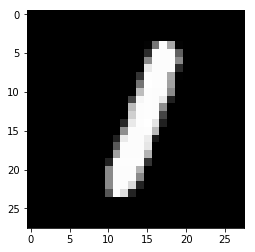

In [30]:
#Visualizing Samples
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap="gray")
    plt.show()
drawImg(X_train[3])

## Checking the actual y value for this X_train row

In [31]:
print(y_train[3])

1


In [32]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
    

In [33]:
cnf_matrix=confusion_matrix(y_test,y_pred)

In [34]:
cnf_matrix

array([[40,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0, 33,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 37]], dtype=int64)

In [35]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



[0 1 2 3 4 5 6 7 8 9]
Confusion matrix, without normalization
[[40  0  0  0  0  1  0  0  0  0]
 [ 0 49  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  1  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 42  0  0  0  0  2]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  0]
 [ 0  1  1  0  0  1  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  1 37]]


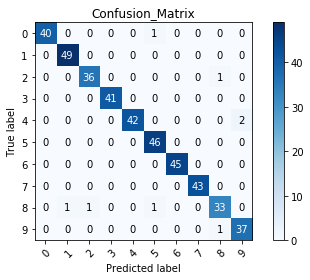

In [36]:
class_labels=np.arange(10)
print(class_labels)
plot_confusion_matrix(y_test,y_pred,classes=class_labels,
                          normalize=False,
                          title="Confusion_Matrix",
                          cmap=plt.cm.Blues)